In [82]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [83]:
#Selecting the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [84]:
#Hyper-parameters

input_size = 784 #in input voglio il flattering del tensore [bach_size, 1,28,28]
hidden_size = 100 #questo significa che i miei hidden layers hanno 500 neuroni
hidden_size2 = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [85]:
#Caricamento Dataset MNIST
train_dataset  = torchvision.datasets.MNIST(root='./dataNN',
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)

test_dataset = torchvision.datasets.MNIST(root='./dataNN',
                                      train=False,
                                      transform=transforms.ToTensor())


In [86]:
#Data Loader:

train_loader  = torch.utils.data.DataLoader(dataset=train_dataset,
                                            batch_size=batch_size,
                                            shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                       batch_size=batch_size,
                                       shuffle=False) #è il test, non serve shuffleare

In [87]:
#Modello di NN:

class NeuralNetwork(nn.Module):
    
    def __init__(self, input_size , hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        

        #forward pass:
    def forward(self, x):
        output = self.fc1(x)
        output = self.relu(output)
        output = self.fc2(output)
        output = self.relu(output)
        output = self.fc3(output)
        return output

model = NeuralNetwork(input_size, hidden_size , num_classes).to(device)


In [88]:
#Loss function, for multiclass classification:
'''def cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred))'''

loss_function = nn.CrossEntropyLoss()

In [89]:
#Optimizier:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [90]:
#Train the model:

total_step = len(train_loader)
print(total_step)
for epoch in range(num_epochs):
    for i , (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # Forward pass:
        outputs = model.forward(images)
        loss = loss_function(outputs, labels)

        # Backward and optimize:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

600
Epoch [1/5], Step [600/600], Loss: 0.2418
Epoch [2/5], Step [600/600], Loss: 0.1097
Epoch [3/5], Step [600/600], Loss: 0.1585
Epoch [4/5], Step [600/600], Loss: 0.0691
Epoch [5/5], Step [600/600], Loss: 0.1093


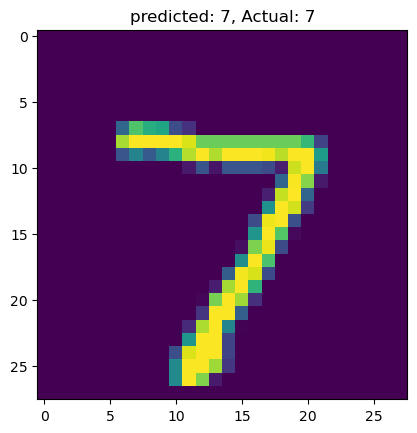

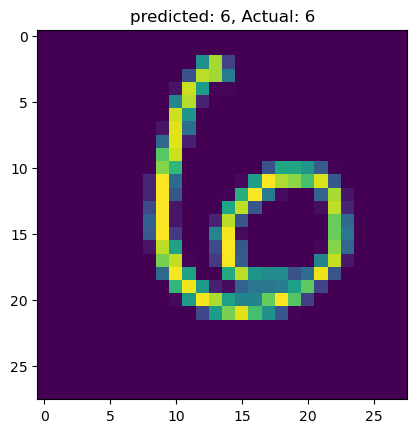

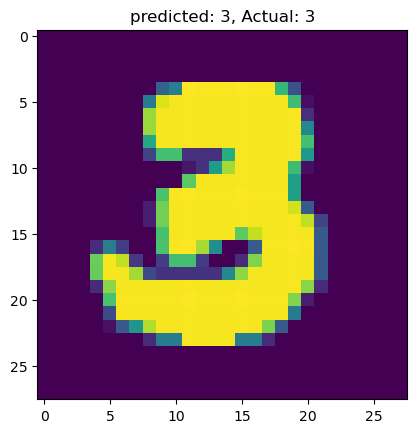

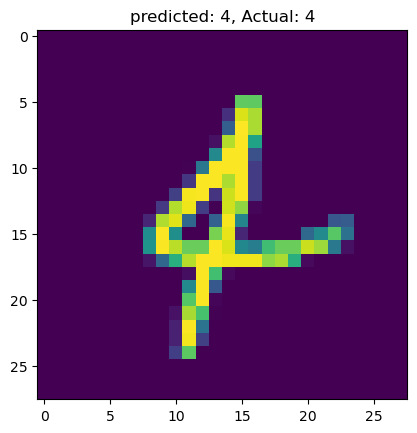

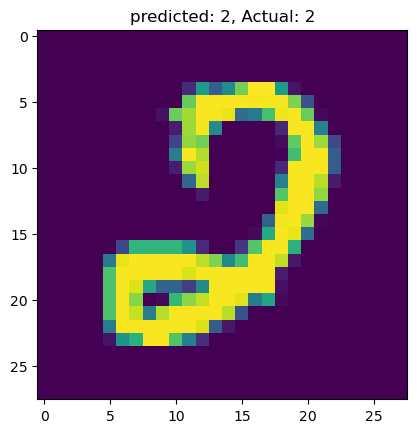

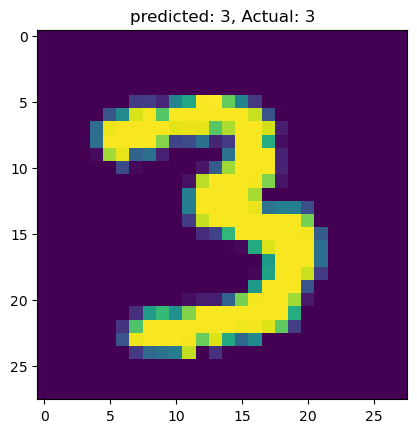

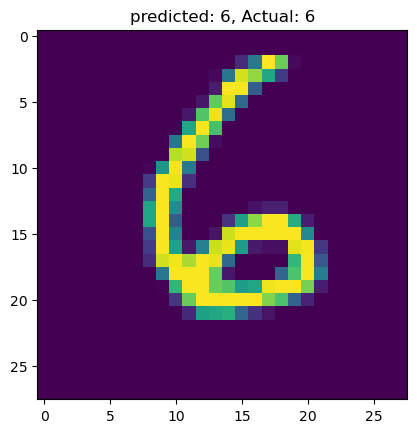

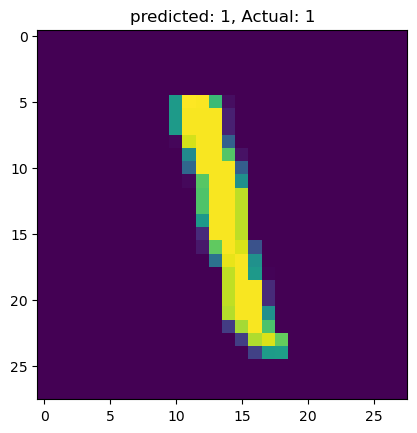

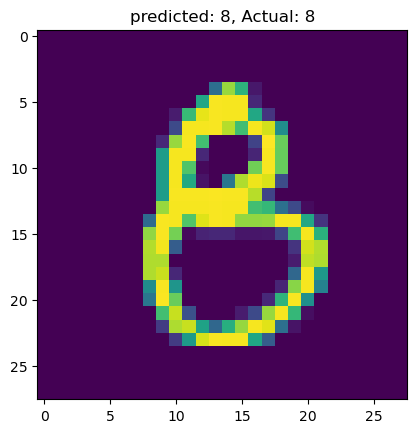

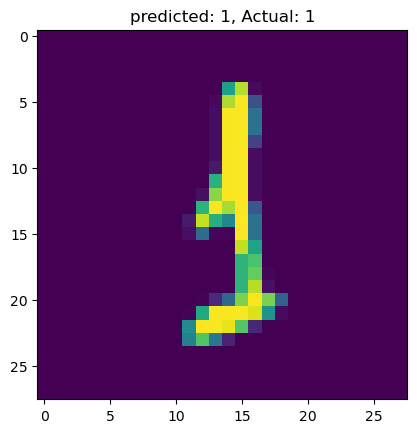

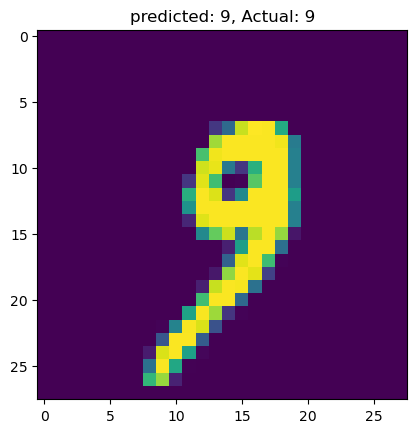

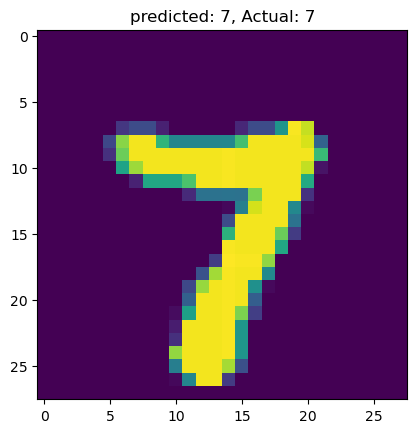

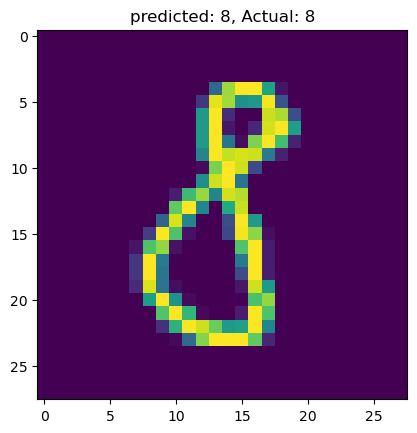

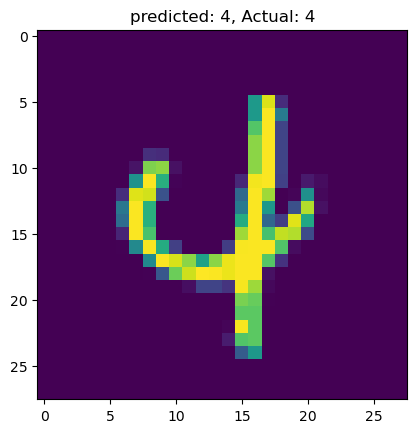

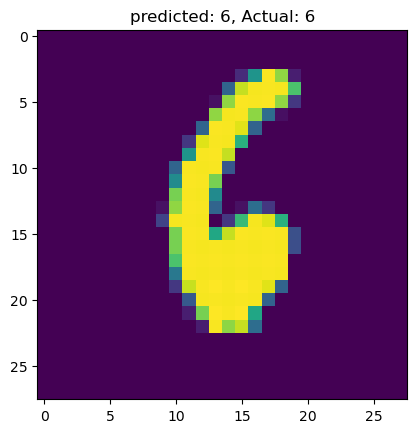

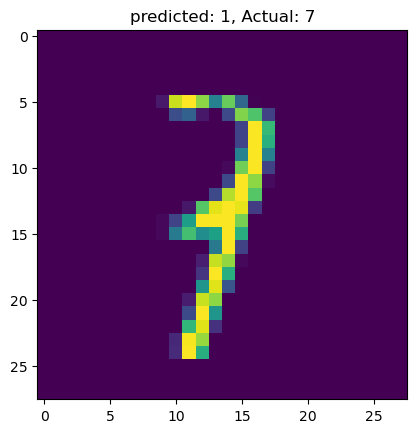

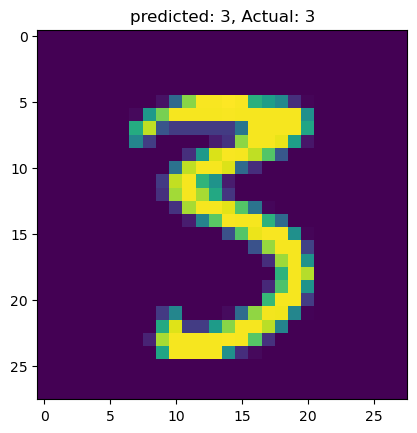

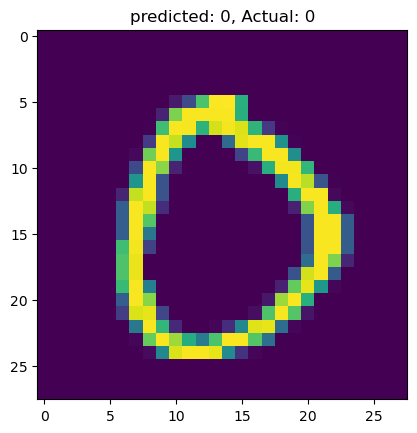

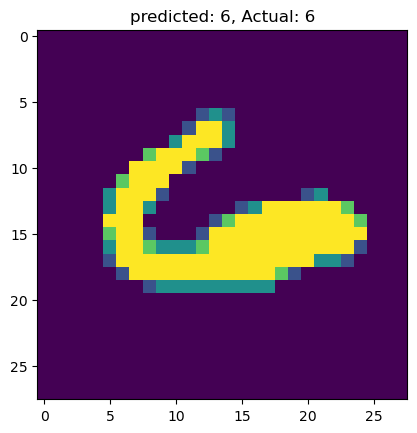

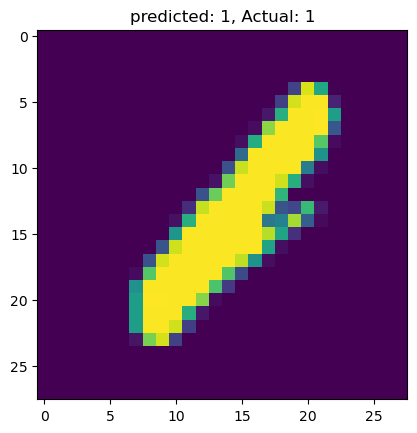

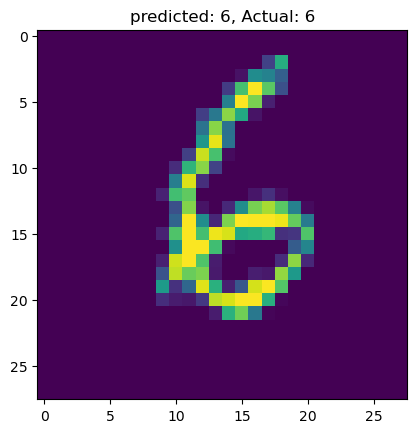

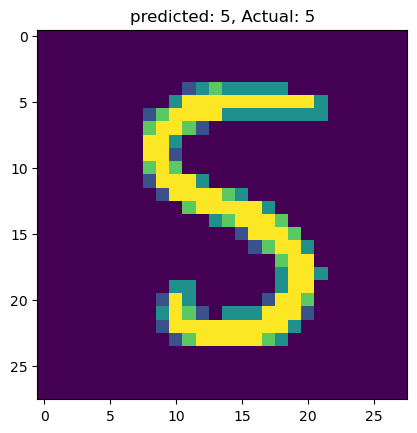

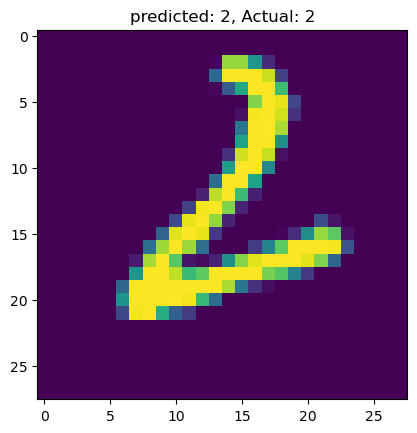

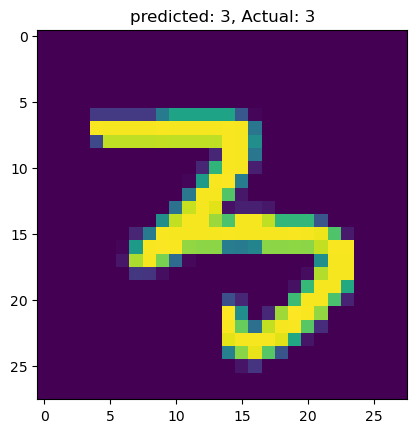

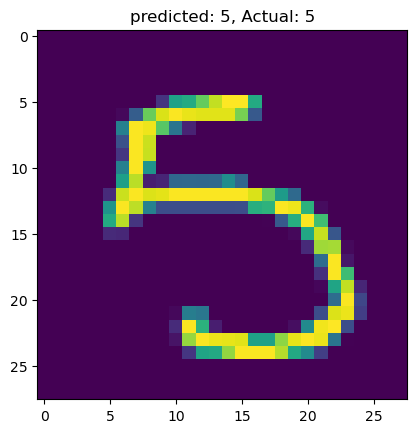

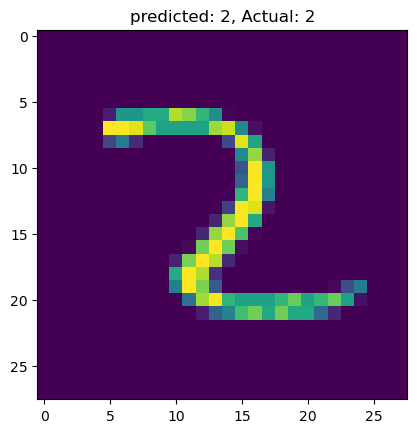

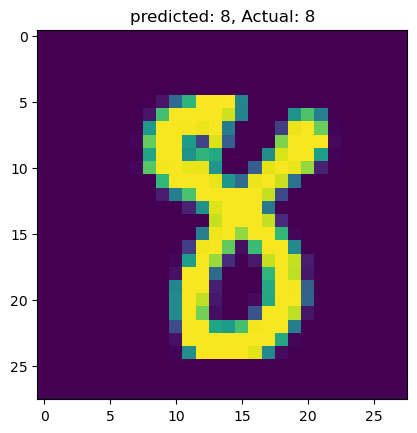

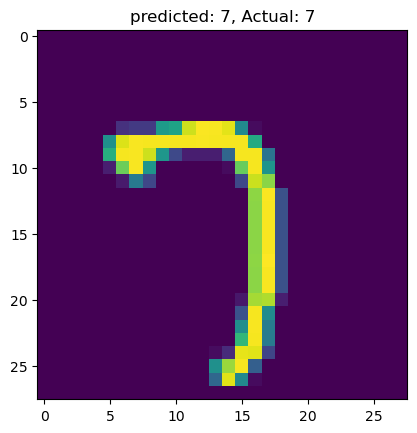

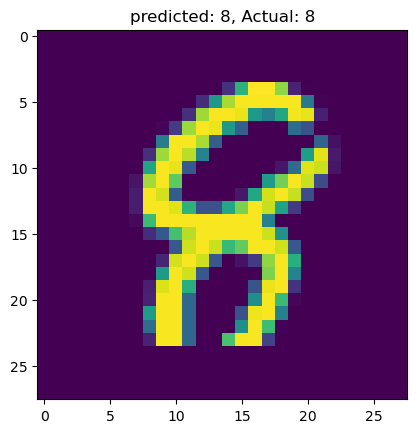

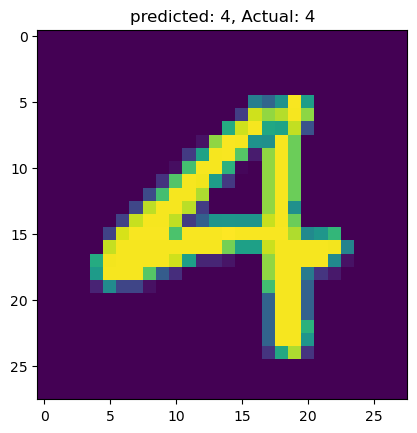

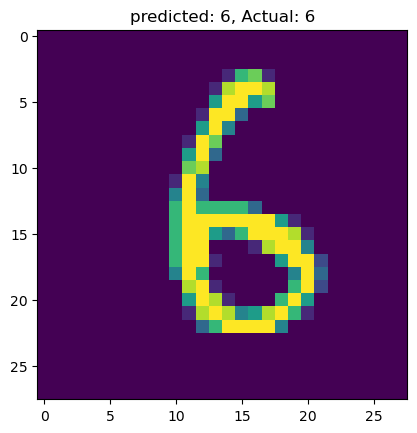

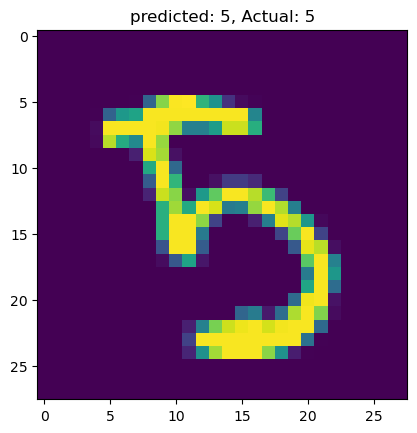

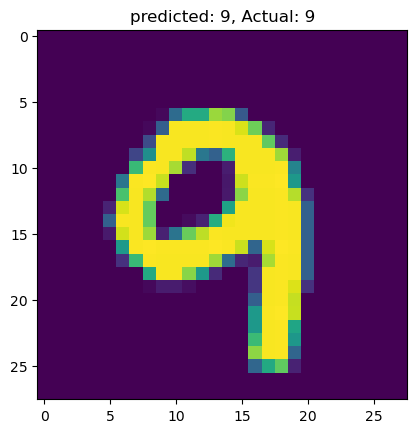

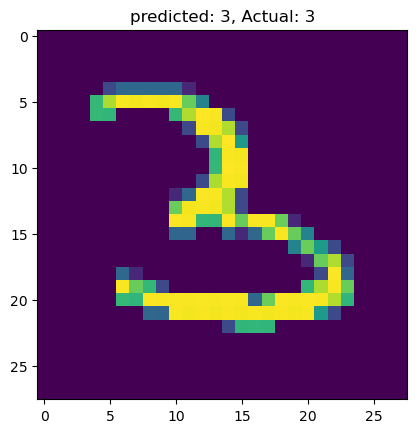

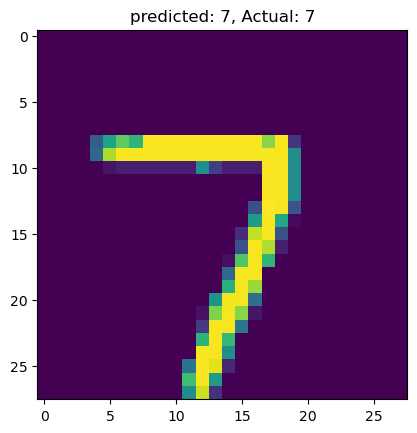

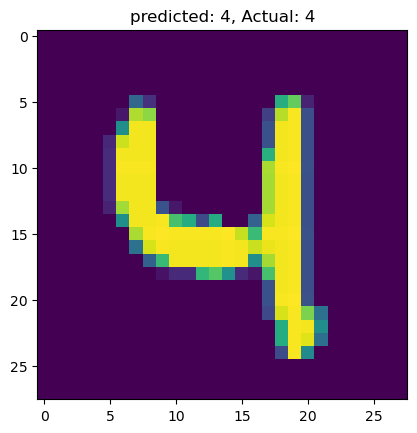

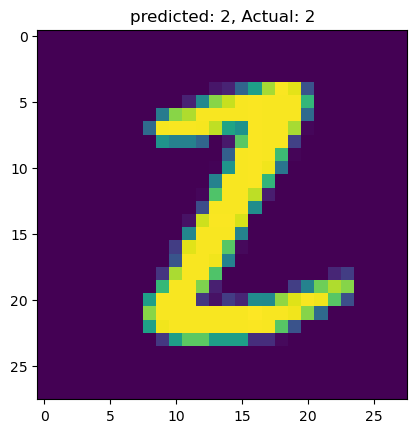

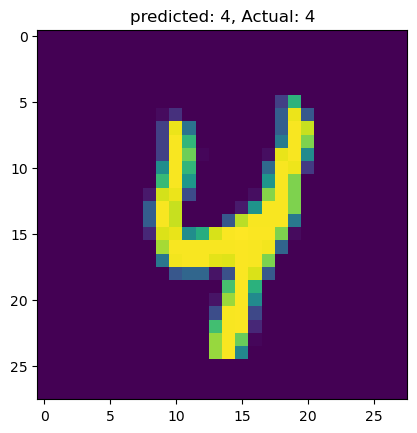

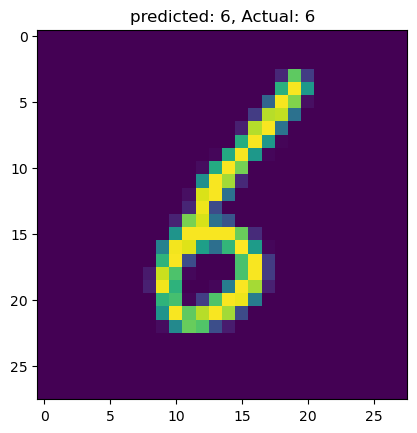

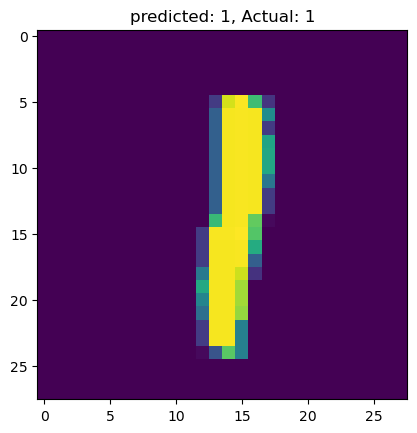

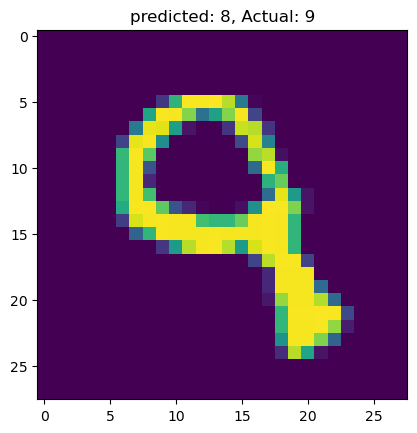

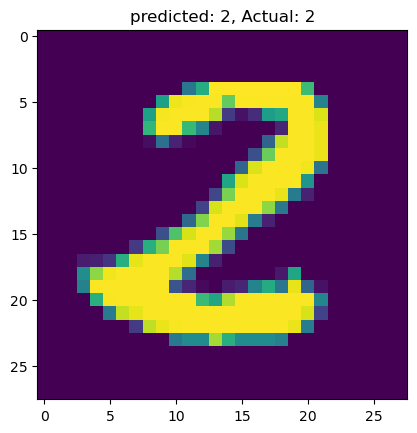

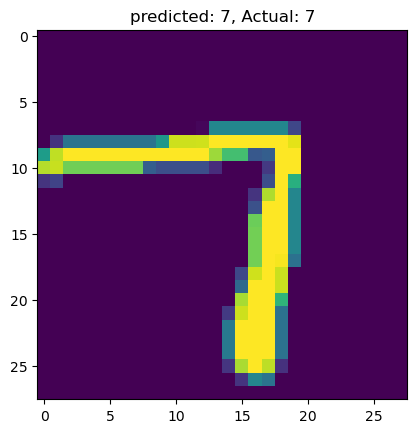

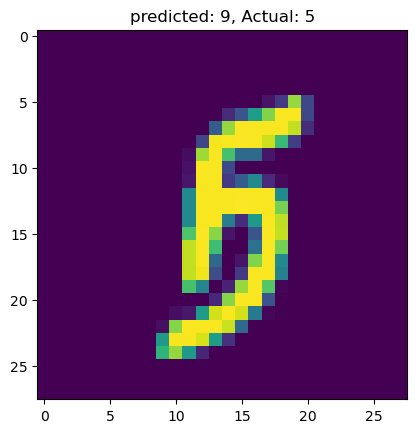

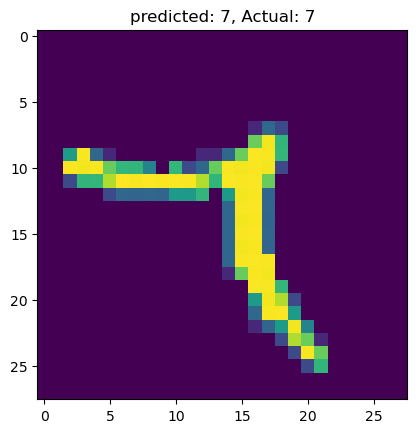

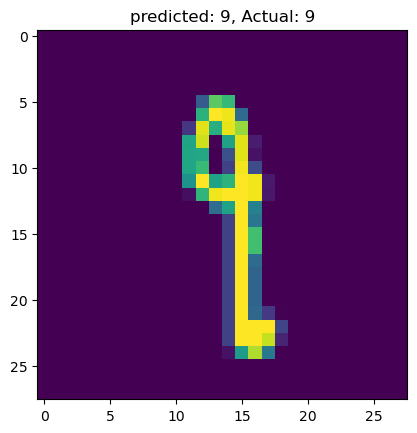

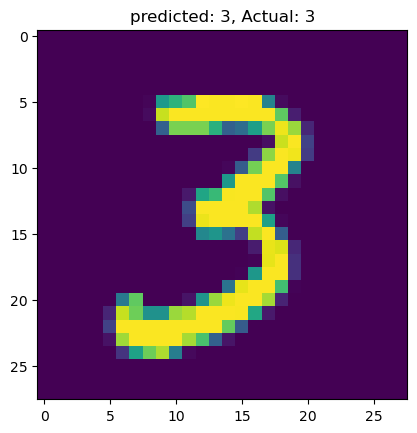

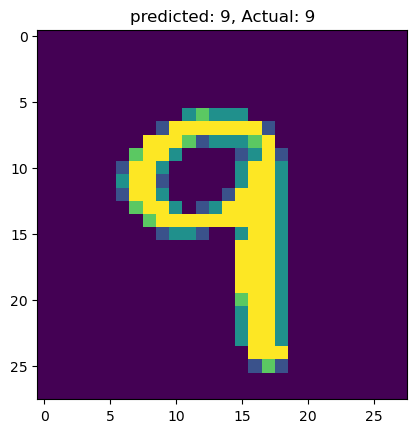

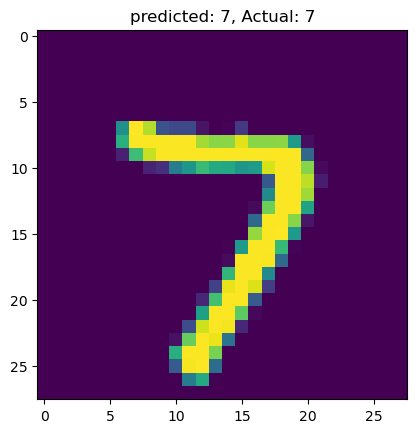

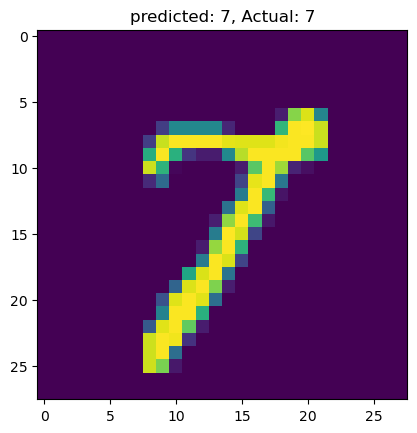

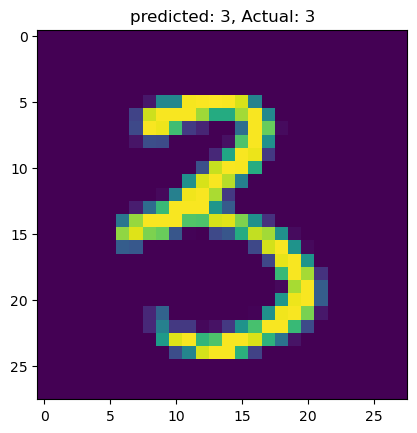

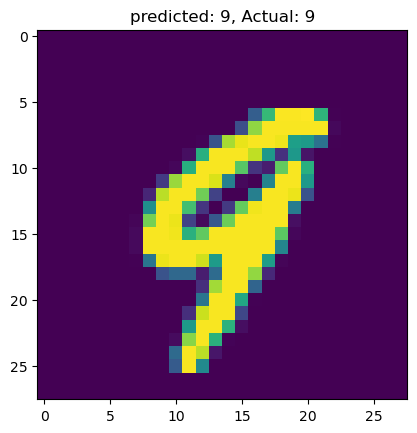

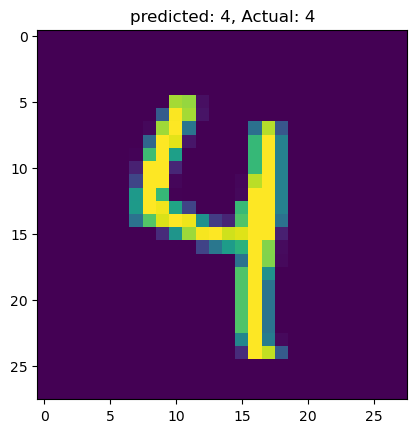

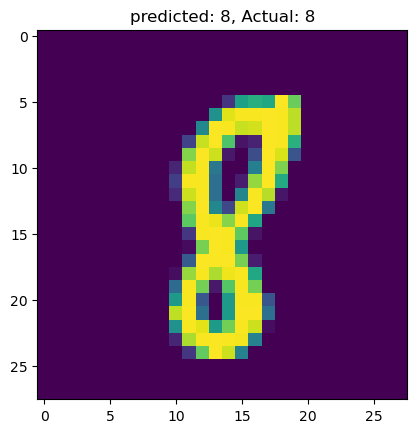

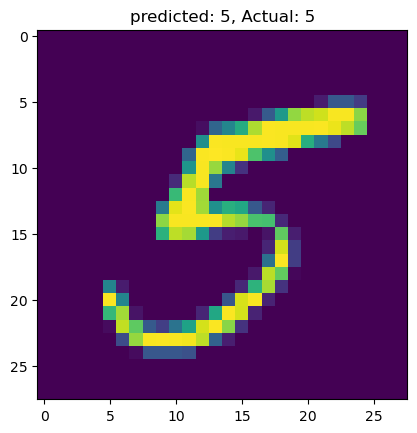

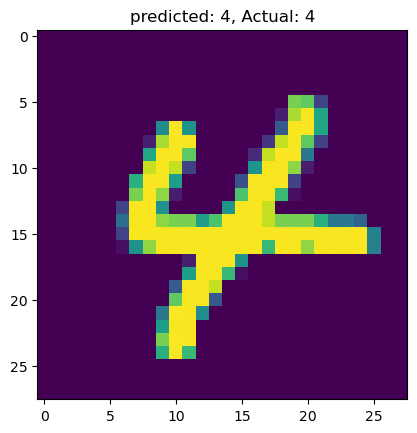

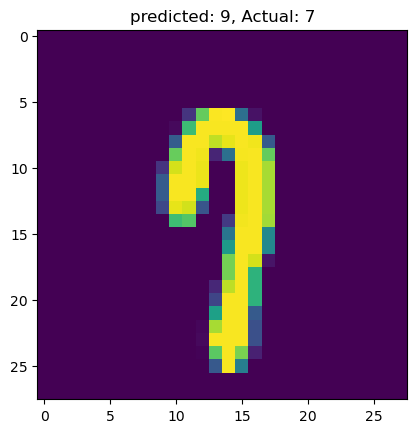

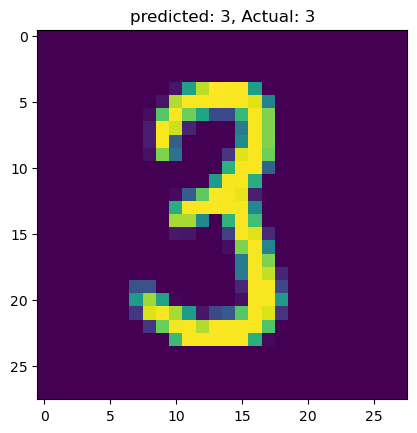

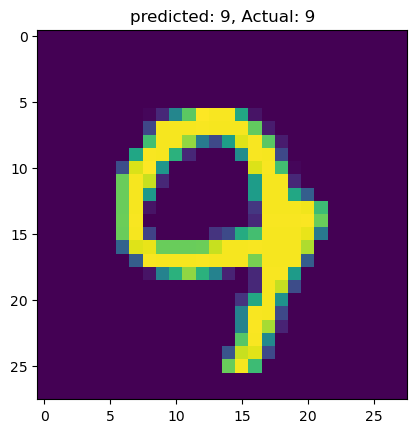

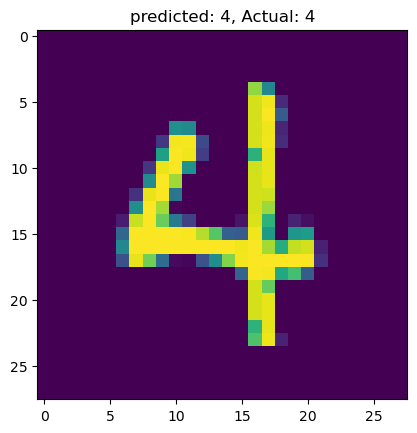

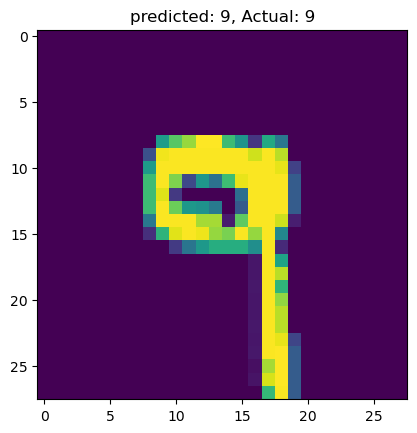

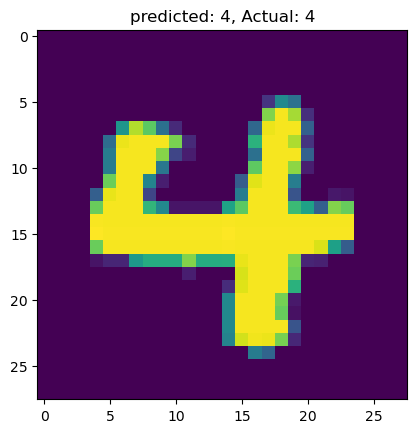

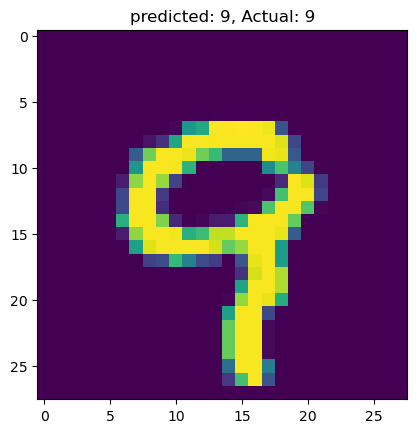

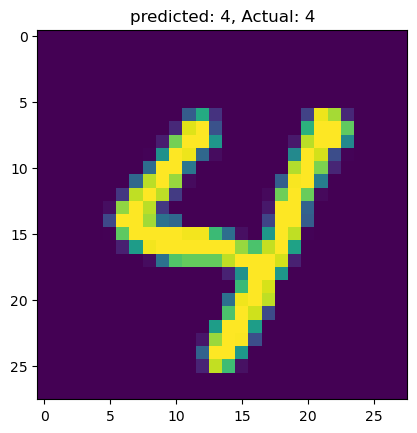

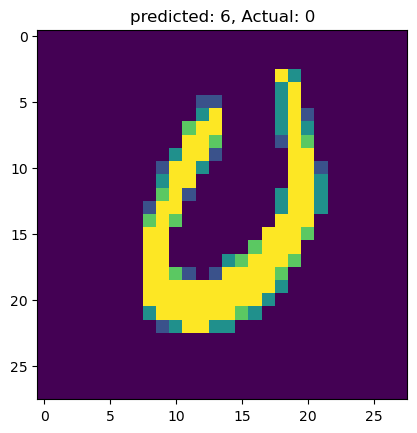

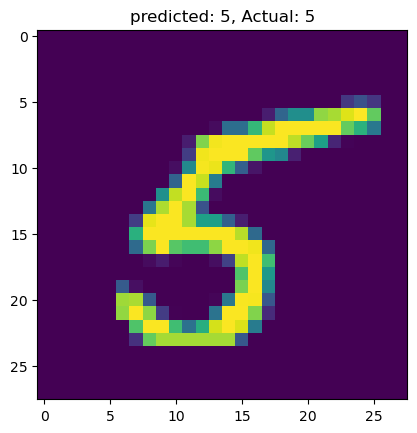

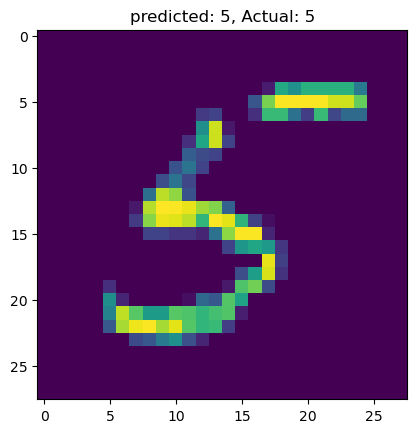

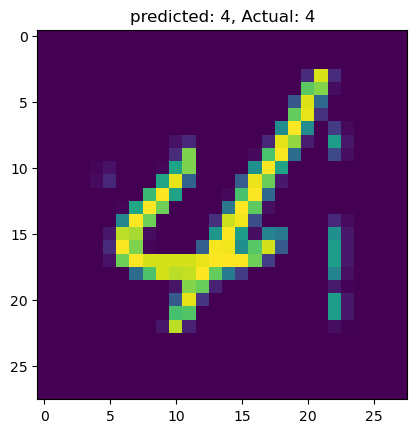

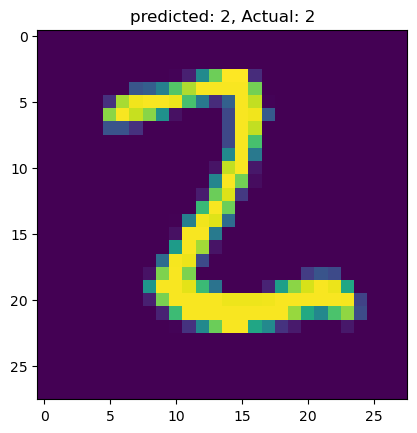

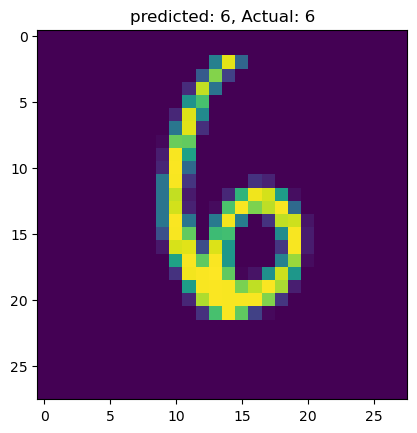

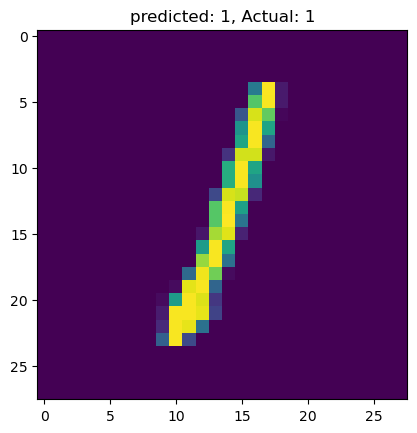

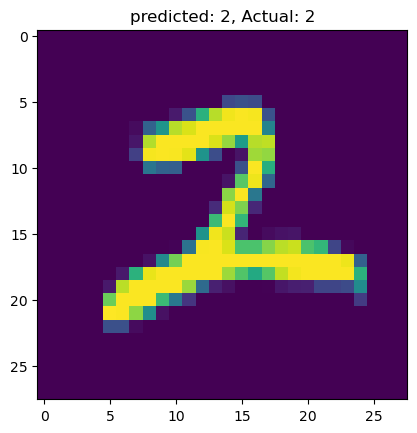

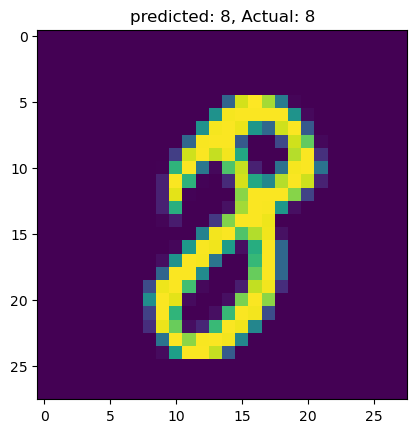

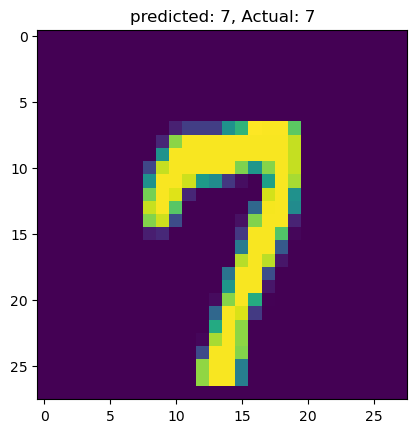

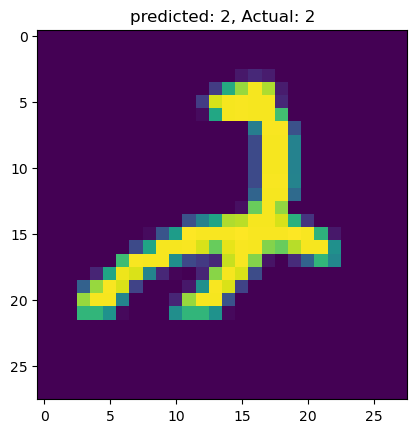

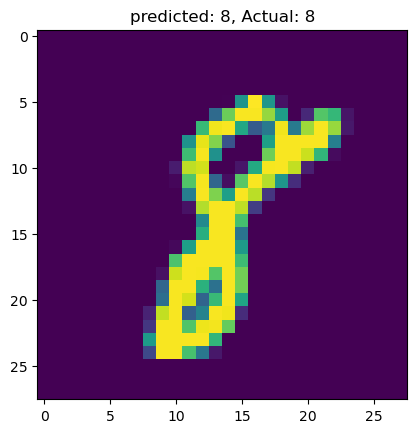

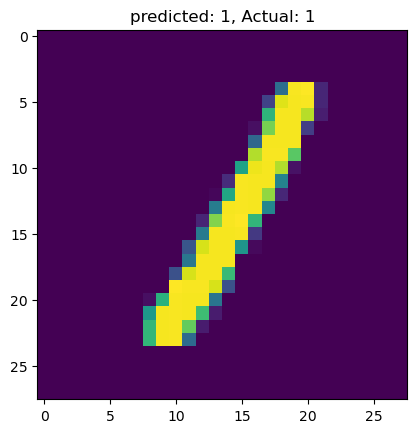

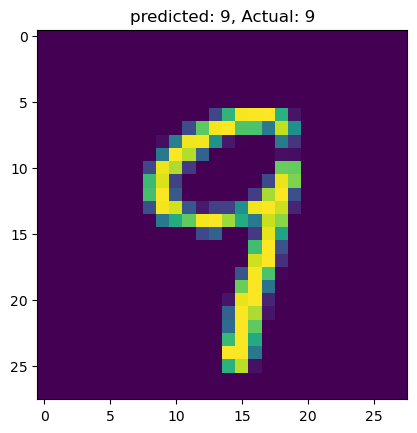

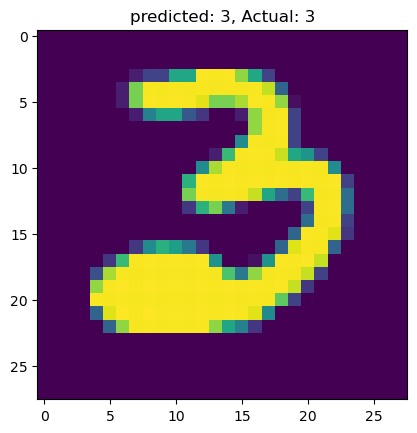

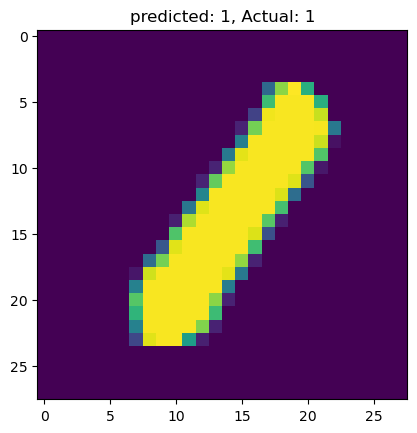

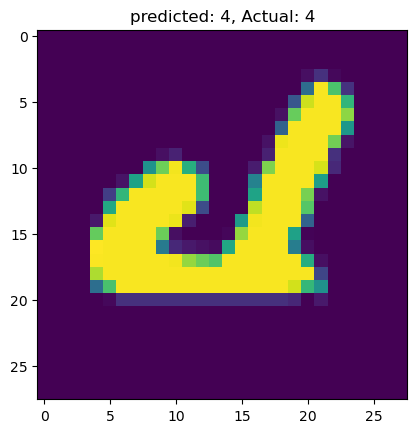

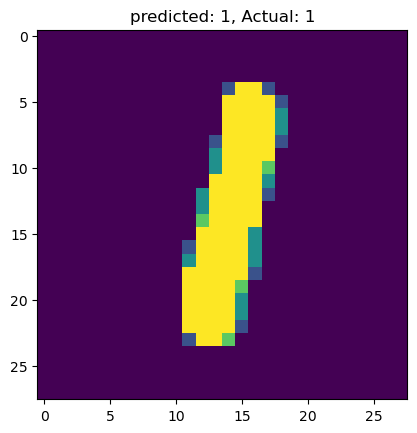

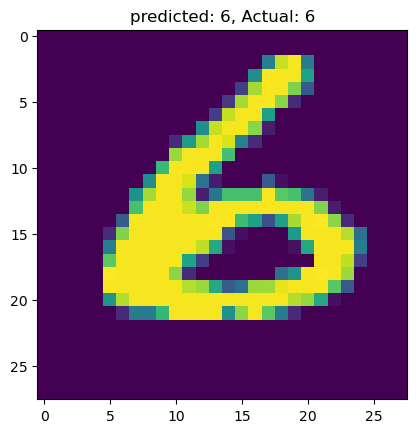

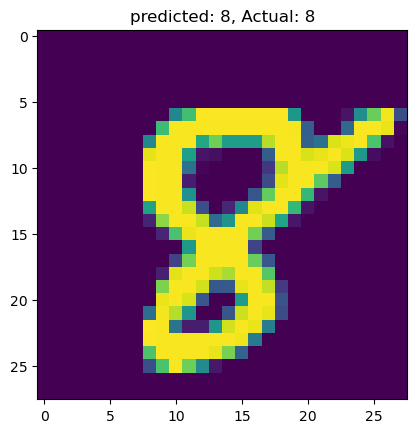

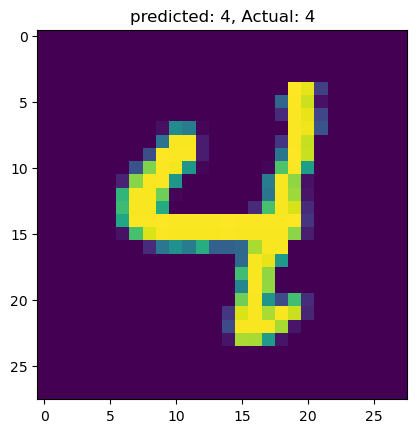

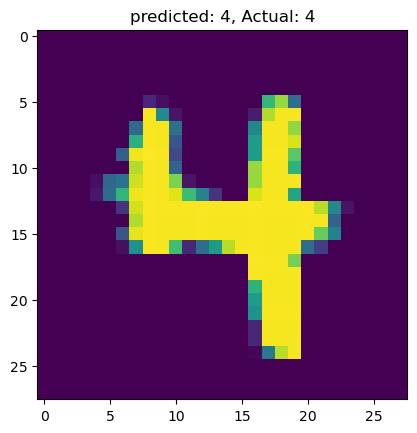

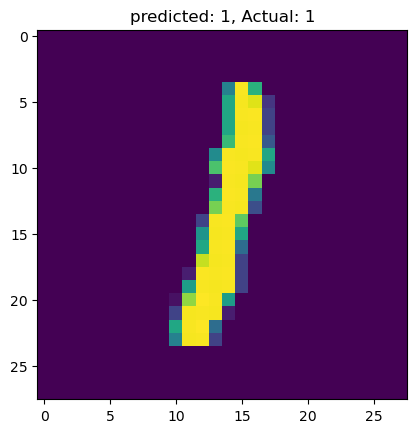

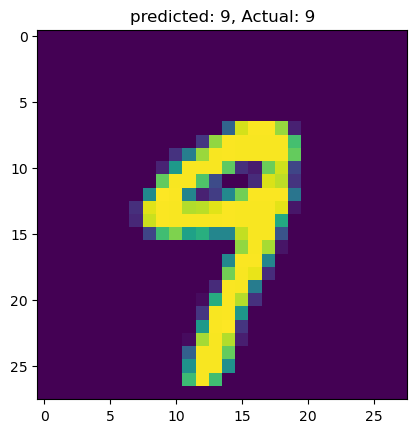

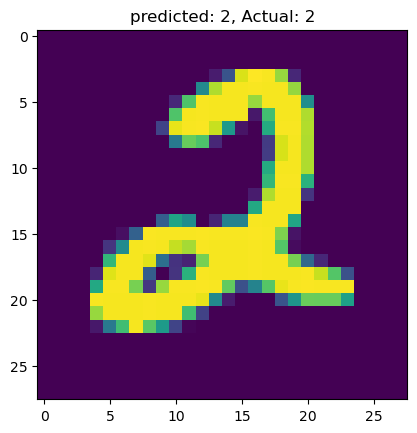

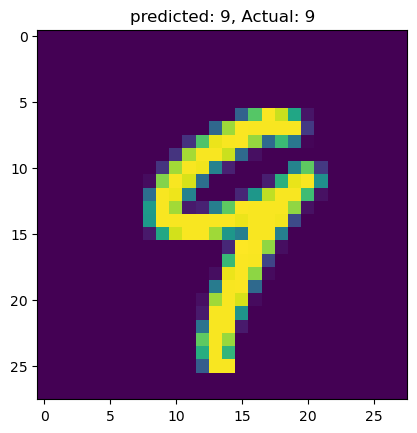

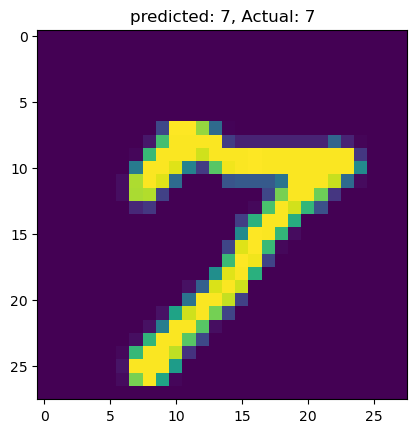

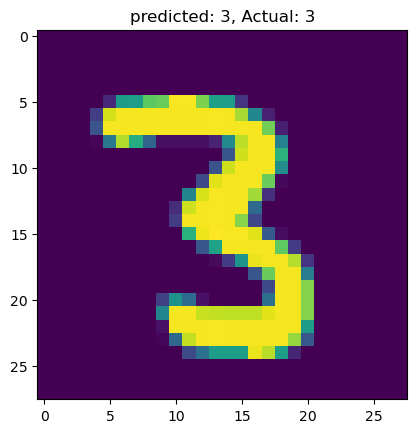

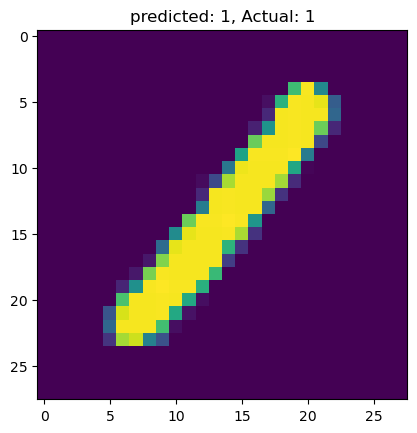

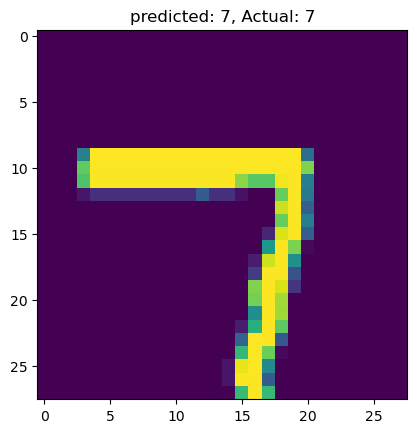

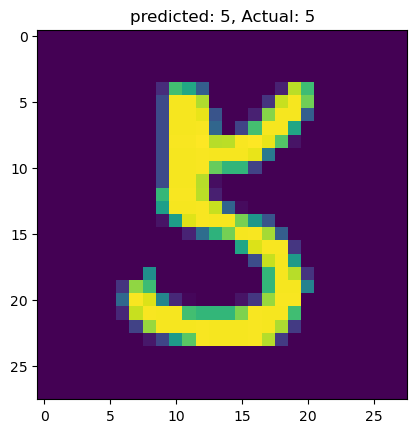

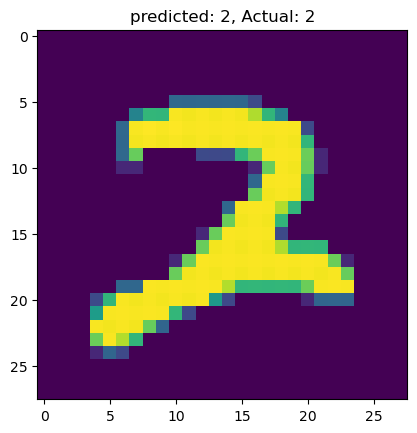

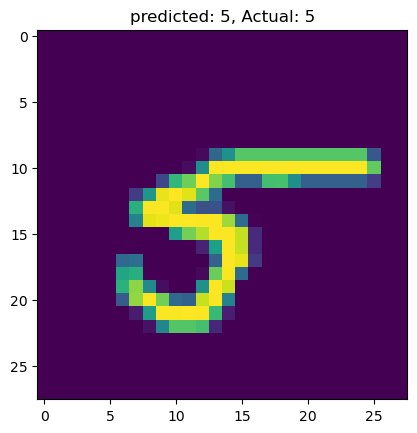

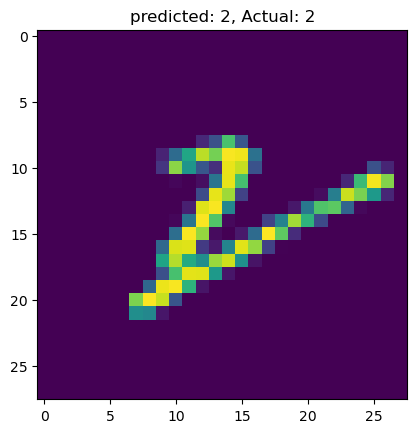

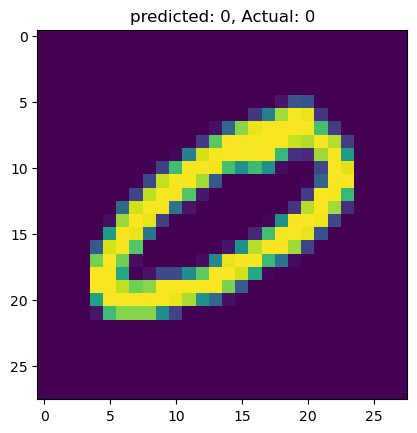

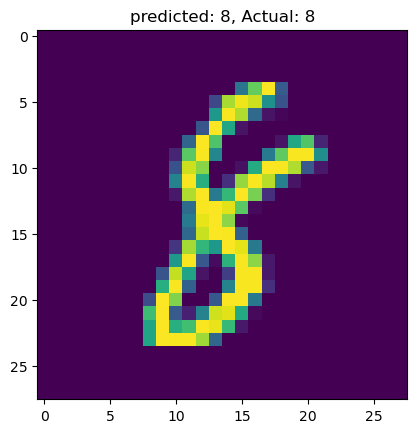

Accuracy of the network on the 10000 test images: 96.88 %


In [91]:
#Test the model:

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        img = images[0].cpu().numpy().transpose(1,2,0)
        images = images.reshape(-1, 28 * 28).to(device)
        lables = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        plt.imshow(img)
        plt.title(f'predicted: {predicted[0].item()}, '
                  f'Actual: {labels[0].item()}')
        plt.show(block=False)
        plt.close()
        total += labels.size(0)
        #print(total)
        correct += (predicted == labels).sum().item()
        #print(correct)

print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
    


In [92]:
#Save the model:
torch.save(model.state_dict(), 'modelNN.ckpt')